In [2]:
# 1. IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# 2. LOAD DATA
data = pd.read_csv("data.csv")
data.head(10)
data.shape

(569, 33)

In [4]:
# 3. BASIC CLEANING
# - drop duplicates
data = data.drop_duplicates()

# - fix column names
for col in ["Unnamed: 32", "id"]:
    if col in data.columns:
        data = data.drop(columns = [col])

# - encode targets
data["diagnosis"] = (data["diagnosis"].astype(str).str.strip().map({"M": 1, "B": 0}))

print("Dataset A – diagnosis value counts:")
print(data["diagnosis"].value_counts(), "\n")

# - check missing values
print("Dataset A – missing values per column:")
print(data.isnull().sum(), "\n")

# - describe()
print("Dataset A – info():")
print(data.info(), "\n")

print("Dataset A – describe():")
print(data.describe().T, "\n")

Dataset A – diagnosis value counts:
diagnosis
0    357
1    212
Name: count, dtype: int64 

Dataset A – missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0

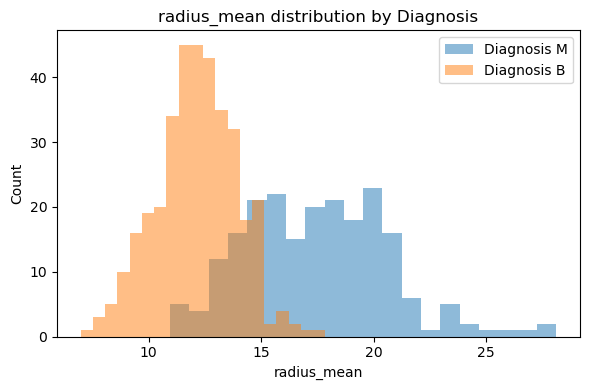

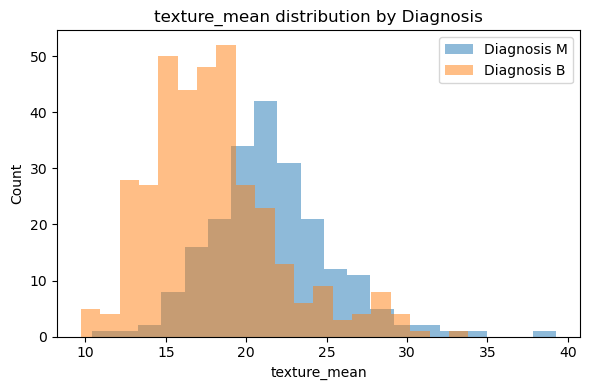

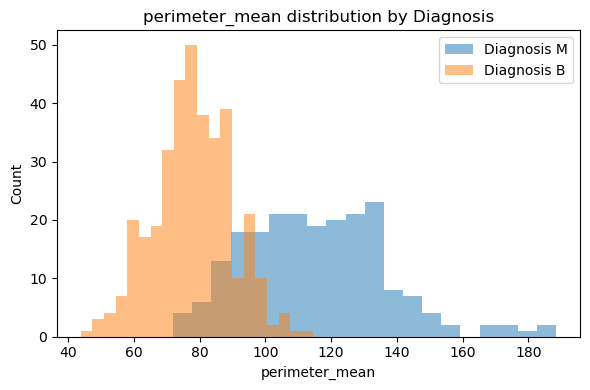

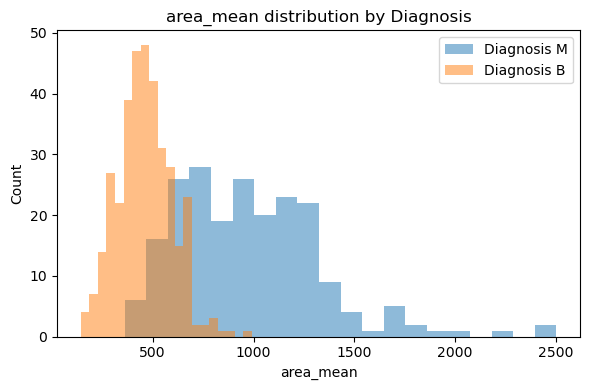

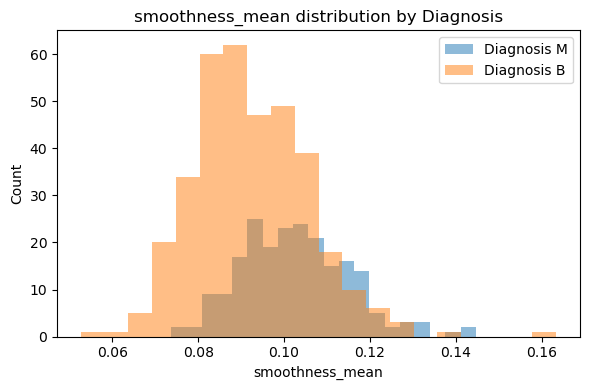

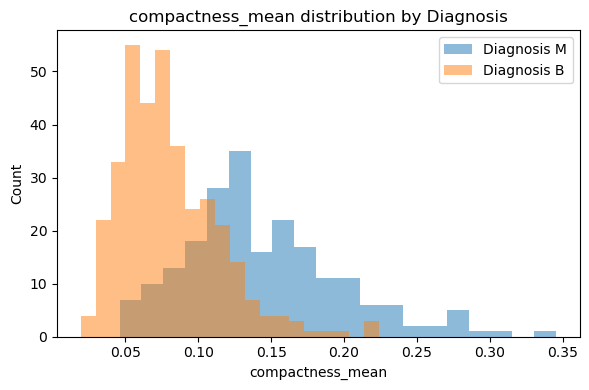

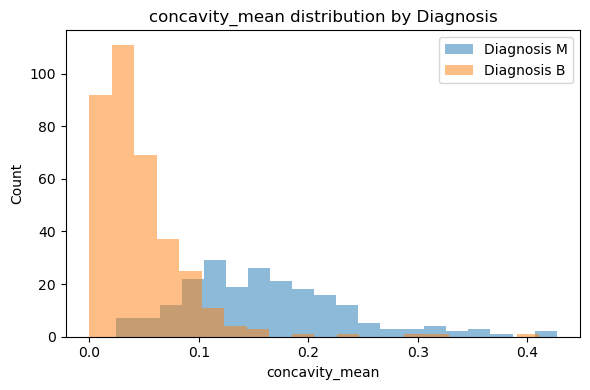

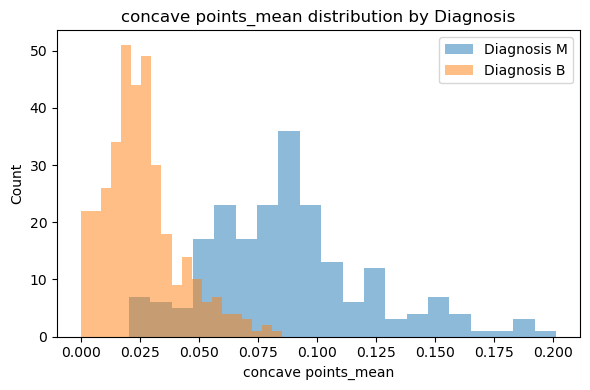

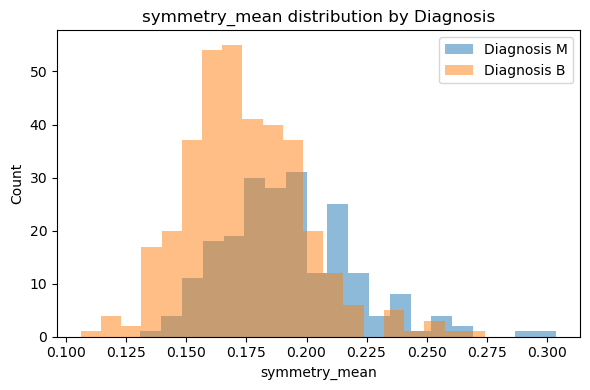

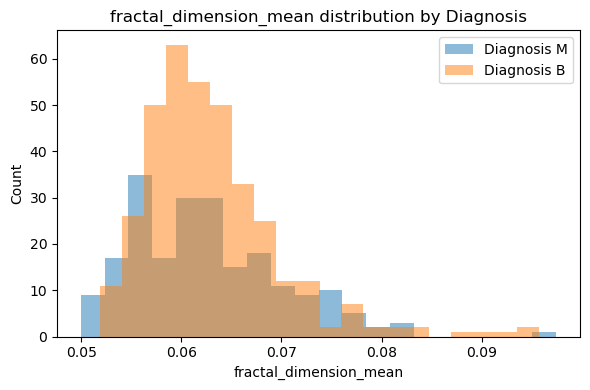

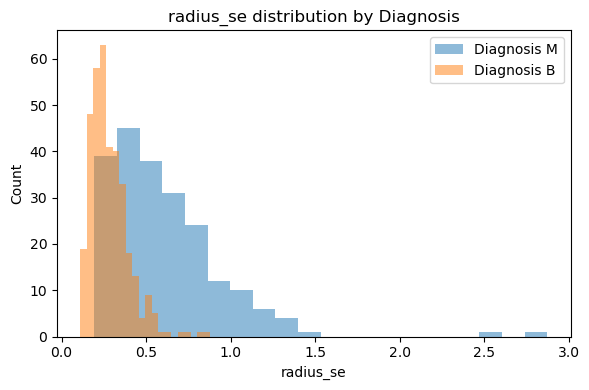

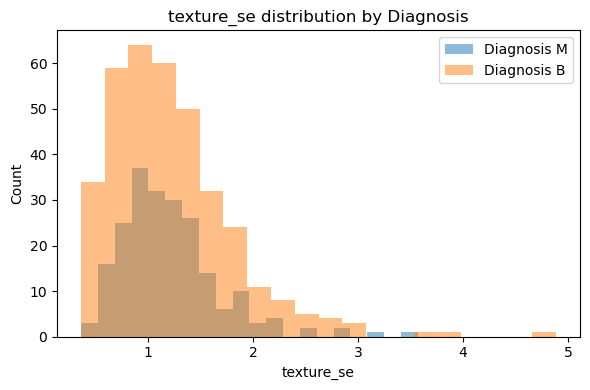

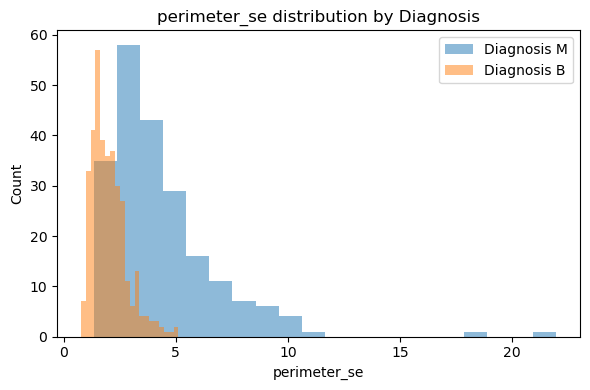

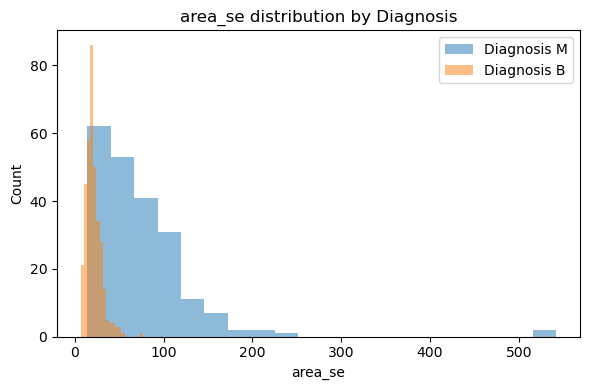

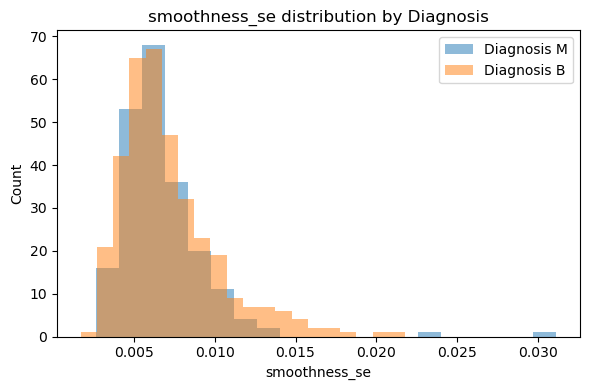

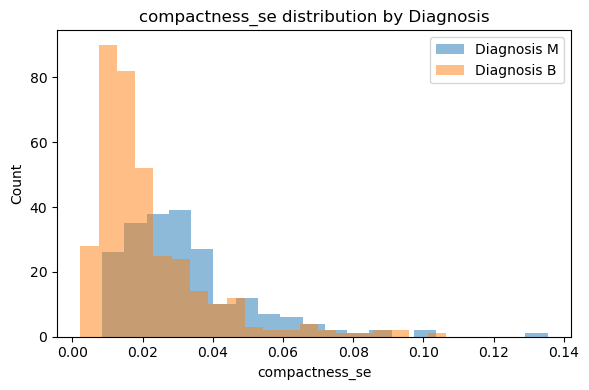

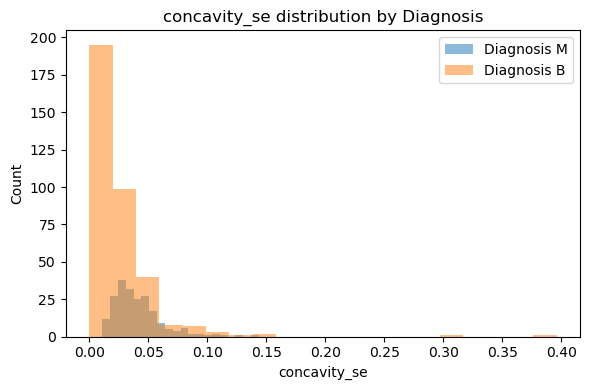

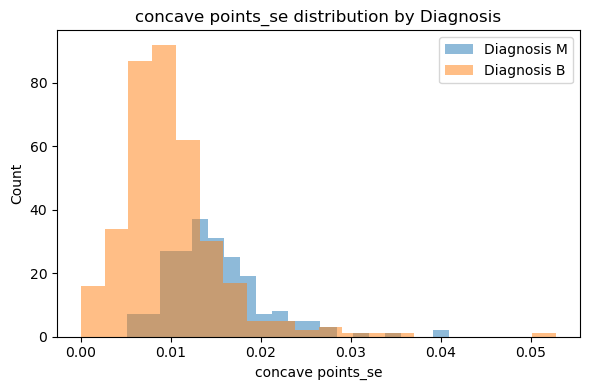

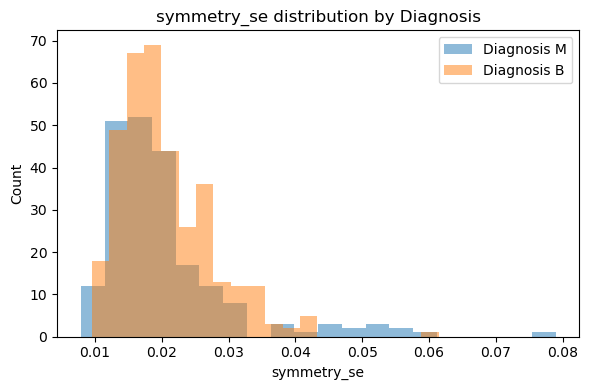

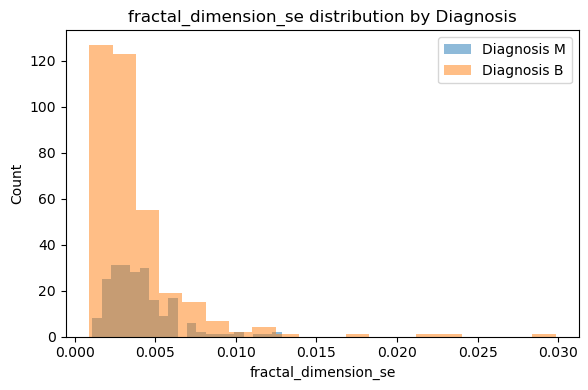

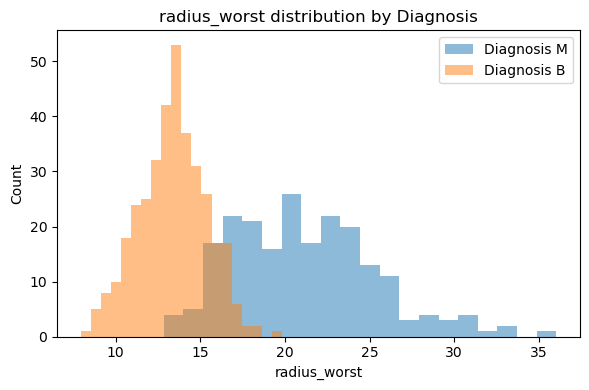

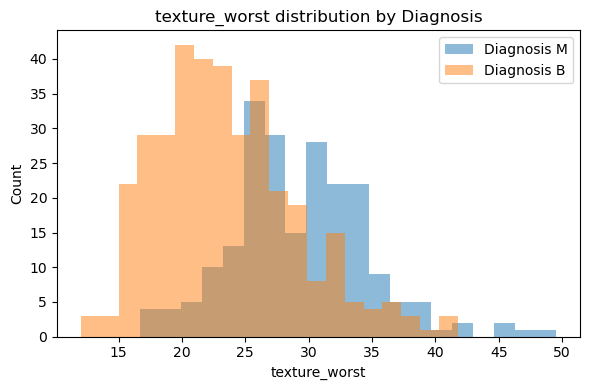

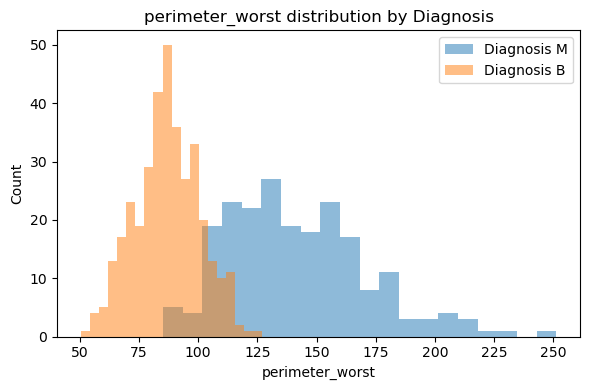

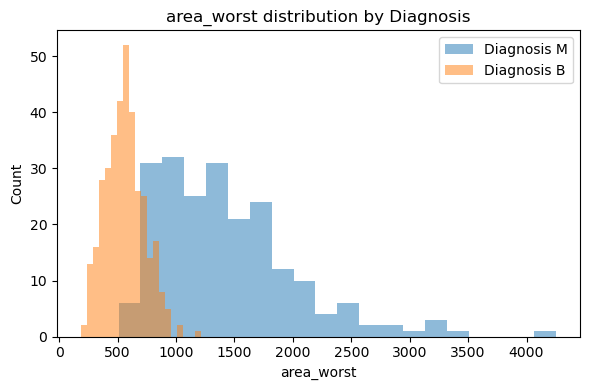

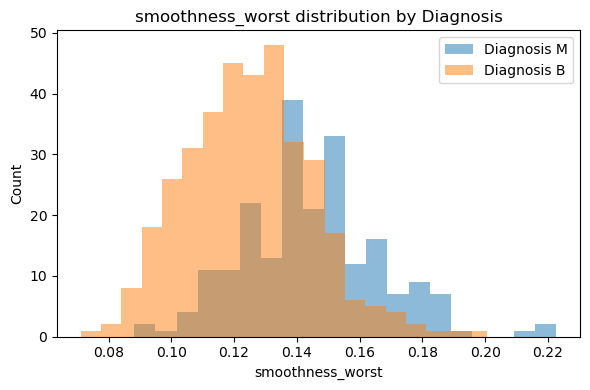

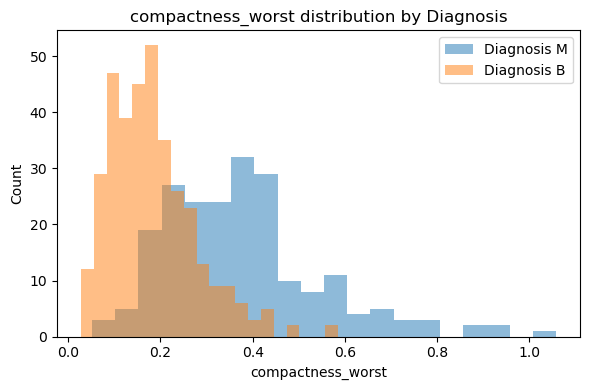

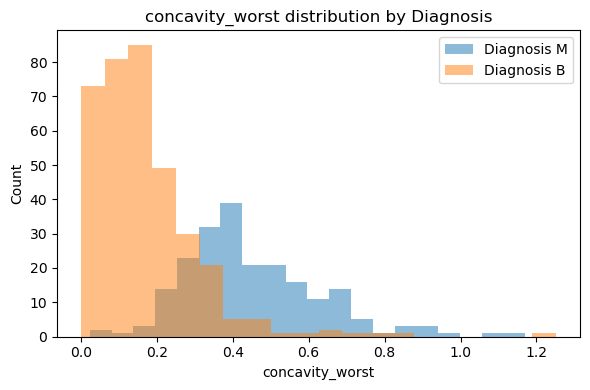

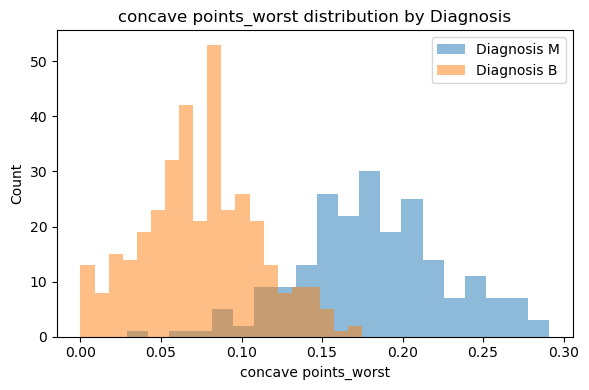

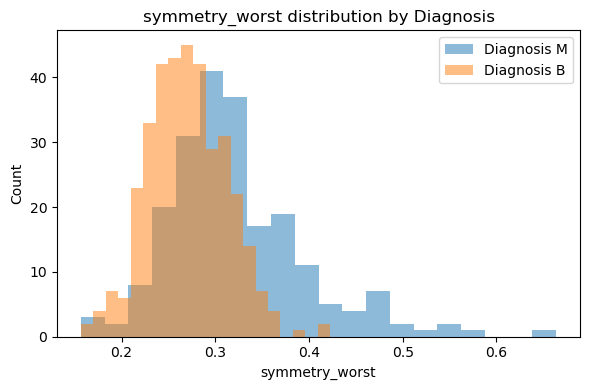

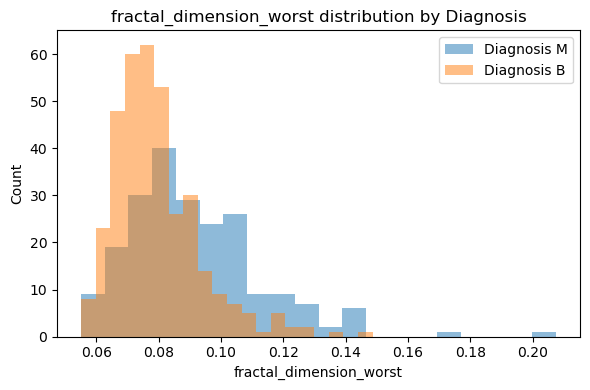

In [5]:
# 4. EXPLORATORY ANALYSIS
# - class distribution
# - histograms
num_cols = [
    col for col in data.columns
    if data[col].dtype != "object" and col != "diagnosis"
]

legend_map = {
    1: "Diagnosis M",
    0: "Diagnosis B"
}
for col in num_cols:
    plt.figure(figsize=(6,4))

    for diag in [1,0]:
        subset = data[data["diagnosis"] == diag][col]
        plt.hist(subset.dropna(), bins=20, alpha=0.5, label=legend_map[diag])

    plt.title(f"{col} distribution by Diagnosis")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


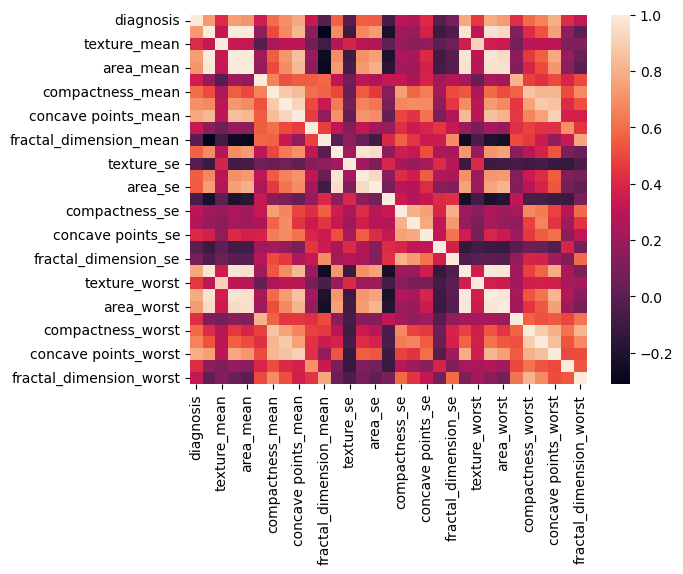

In [6]:
# - correlation heatmap
dataplot = sns.heatmap(data.corr(numeric_only=True))
plt.show()


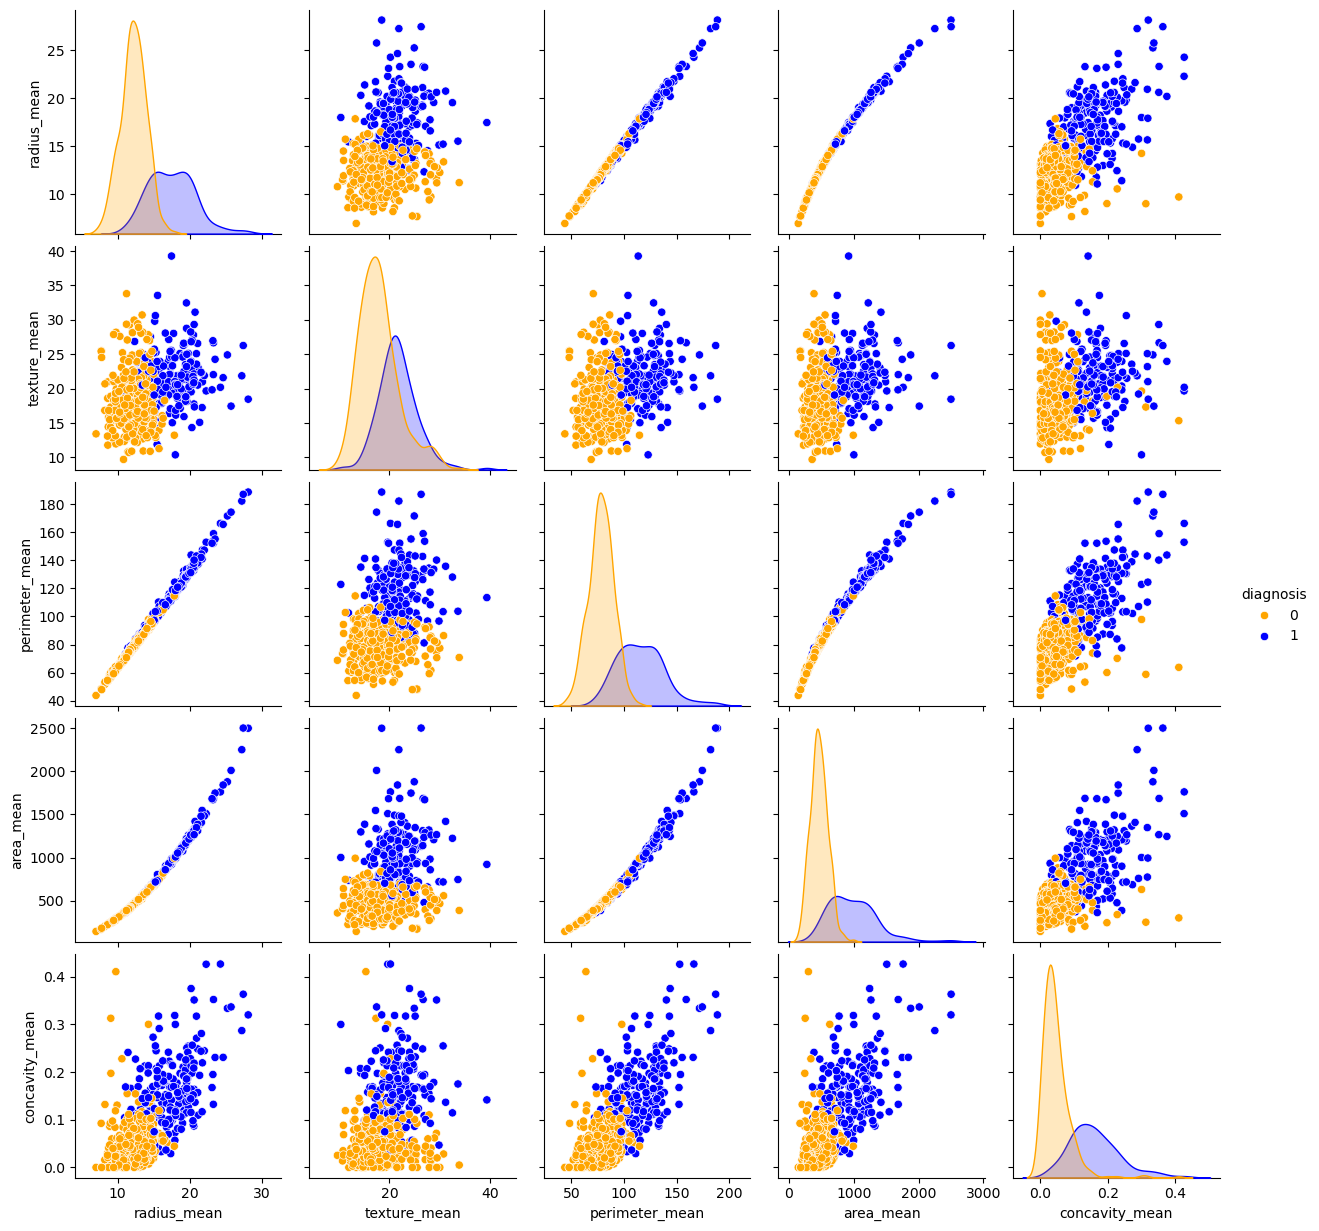

In [7]:
# - pairplots
subset = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'diagnosis']]
custom_palette = {1: 'blue', 0:'orange'}
sns.pairplot(subset, hue='diagnosis', palette=custom_palette)
plt.show()

In [17]:
# 5. DATA PREPROCESSING
# - scaling (if needed)
x=data.drop(columns=['diagnosis'])
y=data['diagnosis']

x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
#x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


print("Scaled shape:", x_train_scaled.shape, x_test_scaled.shape)
# - train/test split
# - categorical encoding
# - imputation if needed

Scaled shape: (455, 30) (114, 30)


In [18]:
# 6. MODELING DATASET A
# - Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(x_train_scaled, y_train)
print(model_LR.score(x_test_scaled, y_test))

# - PCA + model
# - GridSearchCV
# - ROC curve and confusion matrix

0.9649122807017544


In [19]:
# - RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)
y_pred = rf_classifier.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
# - SVM
SVM = SVC(kernel='linear').fit(x_train_scaled, y_train)
y_pred = SVM.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9649122807017544


In [21]:
svm_rbf = SVC(kernel='rbf', gamma='auto', probability=True, random_state=42).fit(x_train_scaled, y_train)
y_pred = svm_rbf.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9736842105263158


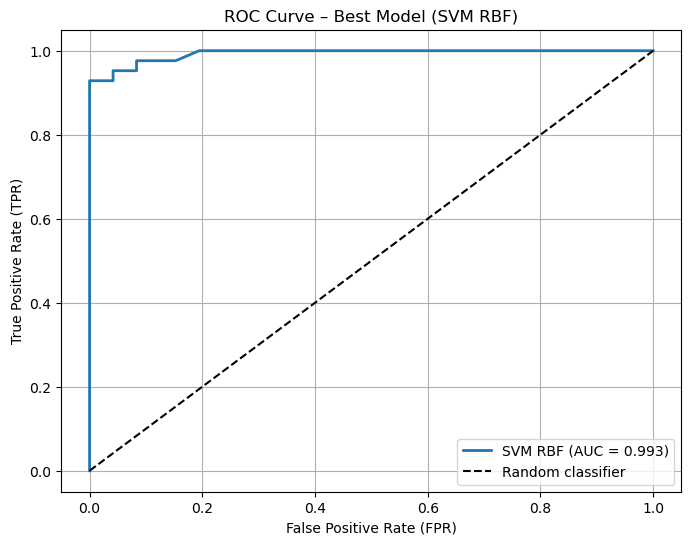

In [27]:
# - ROC curve and confusion matrix
probs = rf_classifier.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM RBF (AUC = {auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve – Best Model (SVM RBF)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [10]:
# 8. FEATURE IMPORTANCE ANALYSIS
# - RF feature importance
# - SHAP (optional)

In [11]:
# 9. RESULTS COMPARISON
# - summary tables
# - accuracy, F1, ROC-AUC vs model
# - visualisation

In [12]:
# 10. CONCLUSIONS FOR REPORT
# - strengths and weaknesses
# - comparison of datasets
# - future work recommendations